## Preprocessing

In [132]:
# variables that are dropped
import pandas as pd
from helper_functions import format_variables, read_data

data_df = read_data()

# to_filter = ["id", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
# data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# transform zeit variable to datetime keeping only the day, month and year:
data_df["zeit"] = pd.to_datetime(data_df["zeit"], format="%Y-%m-%d %H:%M:%S").dt.date
data_df

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
0,11519,2006-04-27,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1.0,1967.0,m,False,True,False,False,142.0,89.0,179,111
1,11520,2006-04-27,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1.0,1968.0,m,False,False,False,False,140.0,70.0,109,80
2,11521,2006-04-27,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1.0,1973.0,m,True,False,False,False,130.0,75.0,128,108
3,11522,2006-04-27,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1.0,1961.0,m,False,False,False,False,100.0,80.0,130,90
4,11524,2006-04-27,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2.0,1978.0,f,False,False,False,False,140.0,70.0,144,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,34694,2006-10-29,3,8616.0,Gasen,Weiz,Steiermark,2.0,1968.0,f,False,True,True,False,110.0,75.0,119,81
16382,34696,2006-10-29,3,8700.0,Leoben,Leoben,Steiermark,2.0,1967.0,f,False,False,False,False,120.0,75.0,137,92
16383,34698,2006-11-02,1,8020.0,Graz - Lend,Graz(Stadt),Steiermark,4.0,1980.0,f,False,False,False,False,130.0,80.0,161,123
16384,34702,2006-11-06,2,8010.0,Graz - Sankt Leonhard,Graz(Stadt),Steiermark,2.0,1979.0,m,False,False,False,False,125.0,90.0,150,77


In [133]:
# Check the range of the variable zeit in the data_df:
print("The range of the variable zeit is from {} to {}".format(data_df["zeit"].min(), data_df["zeit"].max()))

The range of the variable zeit is from 2006-04-27 to 2006-11-06


In [134]:
# read csv data for the weather
weather_df = pd.read_csv("../Supplementary Datasets/Weather_data_Bruck_An_Der_Mur_2006_to_2007.csv", sep=",")

# rename the column datetime to zeit:
weather_df = weather_df.rename(columns={"datetime": "zeit"})
weather_df

,name,zeit,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Bruck an der Mur, Austria",2006-01-01,1.1,-6.9,-2.8,1.1,-6.9,-2.8,-3.6,94.6,...,NaN,NaN,NaN,2006-01-01T07:46:30,2006-01-01T16:18:32,0.05,"Snow, Overcast",Cloudy skies throughout the day with afternoon...,rain,"11170099999,11240099999,11175099999,1129209999..."
1,"Bruck an der Mur, Austria",2006-01-02,2.1,-2.4,0.8,2.1,-6.9,0.1,0.3,96.4,...,NaN,NaN,NaN,2006-01-02T07:46:29,2006-01-02T16:19:31,0.08,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,rain,"11170099999,11180099999,11240099999,1117509999..."
2,"Bruck an der Mur, Austria",2006-01-03,4.1,-3.2,1.4,4.1,-8.9,0.6,0.2,92.3,...,NaN,NaN,NaN,2006-01-03T07:46:25,2006-01-03T16:20:31,0.12,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"11170099999,11180099999,11240099999,1117509999..."
3,"Bruck an der Mur, Austria",2006-01-04,2.1,-3.9,-0.1,2.1,-3.9,-0.2,-0.7,96.1,...,NaN,NaN,NaN,2006-01-04T07:46:19,2006-01-04T16:21:33,0.15,"Snow, Rain, Overcast",Cloudy skies throughout the day with morning r...,snow,"11170099999,11240099999,11175099999,1129209999..."
4,"Bruck an der Mur, Austria",2006-01-05,1.1,-1.5,0.3,1.1,-1.7,0.2,-0.1,97.3,...,NaN,NaN,NaN,2006-01-05T07:46:09,2006-01-05T16:22:38,0.19,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"11170099999,11240099999,11175099999,1129209999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Bruck an der Mur, Austria",2006-12-28,5.1,-6.9,-2.9,5.1,-6.9,-2.9,-4.5,90.2,...,NaN,NaN,NaN,2006-12-28T07:46:03,2006-12-28T16:14:52,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
362,"Bruck an der Mur, Austria",2006-12-29,6.6,-5.1,-0.9,6.6,-5.1,-1.2,-2.4,91.1,...,NaN,NaN,NaN,2006-12-29T07:46:14,2006-12-29T16:15:40,0.32,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
363,"Bruck an der Mur, Austria",2006-12-30,3.1,-5.9,-2.7,2.1,-5.9,-2.8,-3.9,92.3,...,NaN,NaN,NaN,2006-12-30T07:46:22,2006-12-30T16:16:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."
364,"Bruck an der Mur, Austria",2006-12-31,2.4,-4.8,-2.0,2.4,-6.3,-2.1,-2.7,95.0,...,NaN,NaN,NaN,2006-12-31T07:46:28,2006-12-31T16:17:24,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"11170099999,11240099999,11175099999,1129209999..."


In [135]:
# extract rows from april 2006 to december 2006 from weather_df:
weather_df = weather_df[weather_df["zeit"] >= "2006-04-27"]
weather_df = weather_df[weather_df["zeit"] <= "2006-11-06"]

# select only the temperature, zeit, name, tempmax, tempmin, humidity, pressure:
weather_df = weather_df[["zeit", "temp", "tempmax", "tempmin", "humidity"]]

weather_df

,zeit,temp,tempmax,tempmin,humidity
116,2006-04-27,13.3,16.1,10.3,90.1
117,2006-04-28,12.4,14.1,10.0,97.7
118,2006-04-29,10.7,12.1,6.5,92.4
119,2006-04-30,6.5,9.1,2.8,84.0
120,2006-05-01,9.8,16.1,2.3,76.3
...,...,...,...,...,...
305,2006-11-02,2.3,5.1,-0.9,53.2
306,2006-11-03,0.4,6.1,-2.9,77.9
307,2006-11-04,1.4,8.1,-2.4,82.2
308,2006-11-05,6.1,12.1,0.1,69.6


In [136]:
# transform zeit in weather_df and data_df to str:
weather_df["zeit"] = weather_df.zeit.astype(str)
data_df["zeit"] = data_df.zeit.astype(str)

# add the columns temp, tempmax, tempmin, humidity to the data_df on the same rows as the zeit:
merged_df = pd.merge(data_df, weather_df, on="zeit", how="left")
merged_df

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,temp,tempmax,tempmin,humidity
0,11519,2006-04-27,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1.0,1967.0,m,...,False,False,142.0,89.0,179,111,13.3,16.1,10.3,90.1
1,11520,2006-04-27,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1.0,1968.0,m,...,False,False,140.0,70.0,109,80,13.3,16.1,10.3,90.1
2,11521,2006-04-27,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1.0,1973.0,m,...,False,False,130.0,75.0,128,108,13.3,16.1,10.3,90.1
3,11522,2006-04-27,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1.0,1961.0,m,...,False,False,100.0,80.0,130,90,13.3,16.1,10.3,90.1
4,11524,2006-04-27,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2.0,1978.0,f,...,False,False,140.0,70.0,144,103,13.3,16.1,10.3,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,34694,2006-10-29,3,8616.0,Gasen,Weiz,Steiermark,2.0,1968.0,f,...,True,False,110.0,75.0,119,81,13.8,21.1,9.1,80.6
16382,34696,2006-10-29,3,8700.0,Leoben,Leoben,Steiermark,2.0,1967.0,f,...,False,False,120.0,75.0,137,92,13.8,21.1,9.1,80.6
16383,34698,2006-11-02,1,8020.0,Graz - Lend,Graz(Stadt),Steiermark,4.0,1980.0,f,...,False,False,130.0,80.0,161,123,2.3,5.1,-0.9,53.2
16384,34702,2006-11-06,2,8010.0,Graz - Sankt Leonhard,Graz(Stadt),Steiermark,2.0,1979.0,m,...,False,False,125.0,90.0,150,77,8.3,13.1,1.7,66.8


## Descrptive Analysis on the weather data

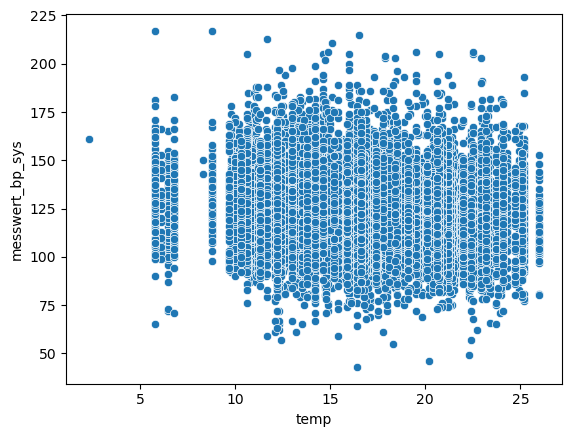

In [137]:
# Check if the temp variable affects the messwert_bp_sys:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="temp", y="messwert_bp_sys", data=merged_df)
plt.show()

In [138]:
# Check if there is a correlation between the temp and the messwert_bp_sys:
merged_df[["temp", "messwert_bp_sys"]].corr()

,temp,messwert_bp_sys
temp,1.000000,-0.092279
messwert_bp_sys,-0.092279,1.000000


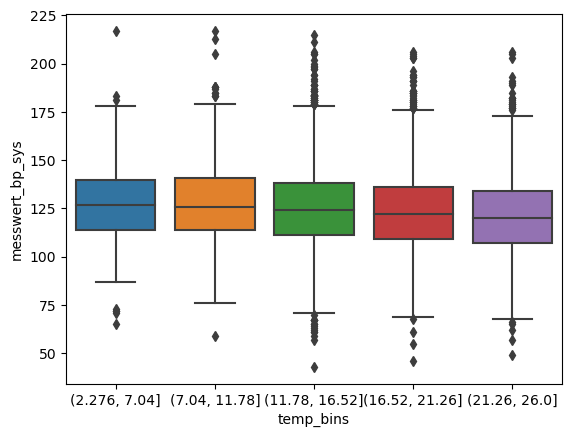

In [139]:
# separate the temp variable into bins and use boxplot:
merged_df["temp_bins"] = pd.cut(merged_df["temp"], bins=5)
sns.boxplot(x="temp_bins", y="messwert_bp_sys", data=merged_df)
plt.show()

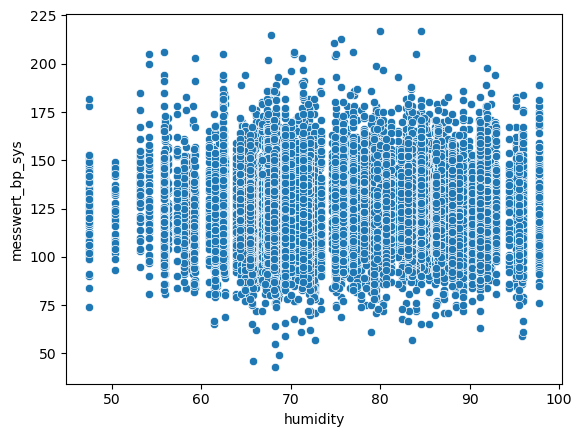

In [140]:
# Check if the humidity variable affects the messwert_bp_sys:
sns.scatterplot(x="humidity", y="messwert_bp_sys", data=merged_df)
plt.show()

In [141]:
# Check if there is a correlation between the humidity and the messwert_bp_sys:
merged_df[["humidity", "messwert_bp_sys"]].corr()

,humidity,messwert_bp_sys
humidity,1.000000,-0.002995
messwert_bp_sys,-0.002995,1.000000


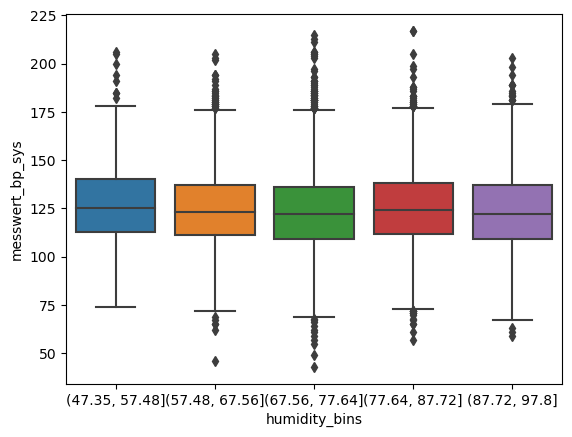

In [142]:
# separate the humidity variable into bins and use boxplot:
merged_df["humidity_bins"] = pd.cut(merged_df["humidity"], bins=5)
sns.boxplot(x="humidity_bins", y="messwert_bp_sys", data=merged_df)
plt.show()

In [143]:
# Correlation between messwert_bp_sys and messwert_bp_dia:
merged_df[["messwert_bp_sys", "messwert_bp_dia"]].corr()

,messwert_bp_sys,messwert_bp_dia
messwert_bp_sys,1.00000,0.67488
messwert_bp_dia,0.67488,1.00000


In [144]:
merged_df

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,temp,tempmax,tempmin,humidity,temp_bins,humidity_bins
0,11519,2006-04-27,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1.0,1967.0,m,...,142.0,89.0,179,111,13.3,16.1,10.3,90.1,"(11.78, 16.52]","(87.72, 97.8]"
1,11520,2006-04-27,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1.0,1968.0,m,...,140.0,70.0,109,80,13.3,16.1,10.3,90.1,"(11.78, 16.52]","(87.72, 97.8]"
2,11521,2006-04-27,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1.0,1973.0,m,...,130.0,75.0,128,108,13.3,16.1,10.3,90.1,"(11.78, 16.52]","(87.72, 97.8]"
3,11522,2006-04-27,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1.0,1961.0,m,...,100.0,80.0,130,90,13.3,16.1,10.3,90.1,"(11.78, 16.52]","(87.72, 97.8]"
4,11524,2006-04-27,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2.0,1978.0,f,...,140.0,70.0,144,103,13.3,16.1,10.3,90.1,"(11.78, 16.52]","(87.72, 97.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,34694,2006-10-29,3,8616.0,Gasen,Weiz,Steiermark,2.0,1968.0,f,...,110.0,75.0,119,81,13.8,21.1,9.1,80.6,"(11.78, 16.52]","(77.64, 87.72]"
16382,34696,2006-10-29,3,8700.0,Leoben,Leoben,Steiermark,2.0,1967.0,f,...,120.0,75.0,137,92,13.8,21.1,9.1,80.6,"(11.78, 16.52]","(77.64, 87.72]"
16383,34698,2006-11-02,1,8020.0,Graz - Lend,Graz(Stadt),Steiermark,4.0,1980.0,f,...,130.0,80.0,161,123,2.3,5.1,-0.9,53.2,"(2.276, 7.04]","(47.35, 57.48]"
16384,34702,2006-11-06,2,8010.0,Graz - Sankt Leonhard,Graz(Stadt),Steiermark,2.0,1979.0,m,...,125.0,90.0,150,77,8.3,13.1,1.7,66.8,"(7.04, 11.78]","(57.48, 67.56]"


In [145]:
# fit a linear regression model to the measured blood pressure diastolic:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from helper_functions import format_variables

# create catergorical and numerical features lists:
# filter all time related data
merged_df['zeit'] = pd.to_datetime(merged_df['zeit'])

merged_df, merged_df_cat, merged_df_num = format_variables(
    merged_df,
    to_filter=["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr",
               "schaetzwert_bp_sys", "schaetzwert_by_dia", "terminal", "temp_bins", "humidity_bins"],
    drop_values=True)

merged_df

,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,messwert_bp_sys,messwert_bp_dia,temp,tempmax,tempmin,humidity,month,hour,day,age
0,Steiermark,2,f,False,False,False,False,123.0,86.0,13.0,18.1,8.8,91.9,10,0,25,42
1,Steiermark,1,f,False,False,False,False,162.0,86.0,16.3,22.1,10.8,76.0,8,0,28,53
2,Steiermark,2,m,False,False,False,False,121.0,66.0,13.9,19.1,8.1,55.9,6,0,4,46
3,Steiermark,5,f,False,True,True,False,122.0,70.0,12.6,19.1,7.1,87.0,10,0,13,34
4,Steiermark,1,f,False,False,True,False,110.0,75.0,12.1,13.1,10.5,96.0,8,0,12,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,Steiermark,2,m,False,False,True,False,116.0,80.0,14.4,20.1,5.8,50.4,5,0,11,52
14827,Steiermark,1,m,False,True,True,True,138.0,84.0,23.4,31.1,14.2,69.4,7,0,11,55
14828,Steiermark,2,f,False,True,True,True,116.0,62.0,15.4,23.1,10.1,79.7,9,0,28,61
14829,Steiermark,1,m,False,False,False,False,113.0,88.0,6.5,9.1,2.8,84.0,4,0,30,44


In [149]:
# dummy code the categorical variables:
from helper_functions import encode_data, separate_target

one_hot_data = pd.get_dummies(merged_df[merged_df_cat], drop_first=True, dtype=int)

for var in merged_df_num:
    one_hot_data[var] = merged_df[var]


encoded_data = one_hot_data
encoded_train_set, encoded_test_set = train_test_split(encoded_data, test_size=0.3)

target = 'messwert_bp_sys'
x_train_sys, y_train_sys = separate_target(encoded_train_set, target)
x_test_sys, y_test_sys = separate_target(encoded_test_set, target)

x_train_sm_sys = sm.add_constant(x_train_sys)
x_test_sm_sys = sm.add_constant(x_test_sys)

model_dia = sm.OLS(y_train_sys, x_train_sm_sys.astype(float)).fit()

print(model_dia.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_sys   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     437.8
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        16:36:02   Log-Likelihood:                -41527.
No. Observations:               10381   AIC:                         8.311e+04
Df Residuals:                   10354   BIC:                         8.330e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [150]:
# Extract significant variables from the model:
significant_vars = model_dia.pvalues[model_dia.pvalues < 0.05].index.tolist()
significant_vars.remove("const")
significant_vars

['befinden_2',
 'geschlecht_m',
 'blutzucker_bekannt_True',
 'in_behandlung_True',
 'messwert_bp_dia',
 'temp',
 'tempmax',
 'humidity',
 'month',
 'day',
 'age']

In [152]:
# Add interaction terms to the model:

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_sys[significant_vars])
x_test_poly = poly.fit_transform(x_test_sys[significant_vars])

x_train_poly = sm.add_constant(x_train_poly)
x_test_poly = sm.add_constant(x_test_poly)

model_poly = sm.OLS(y_train_sys, x_train_poly.astype(float)).fit()

print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_sys   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        16:38:14   Log-Likelihood:                -41406.
No. Observations:               10381   AIC:                         8.295e+04
Df Residuals:                   10314   BIC:                         8.343e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6486     14.465      3.087      0.0